In [1]:
#import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

In [ ]:
# house sale price = b0 + b1(house size)
# b0 = base price
# b1 = price change per sq ft

In [2]:
set_config(transform_output="pandas")

In [4]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


In [5]:
sacramento_train, sacramento_test = train_test_split(sacramento, train_size= 0.75, random_state=42)

In [6]:
# step 1. define our x and y
X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train['price']

In [7]:
#step 2. initialize our model
lm = LinearRegression()

In [8]:
lm.fit(X_train, y_train)

LinearRegression()

In [9]:
# make a data frame containing b1 and b0

pd.DataFrame({
  'slope': [lm.coef_[0]],
  'intercept':[lm.intercept_]  
})

,slope,intercept
0,139.614833,7069.127004


In [10]:
sacramento_test['predicted'] = lm.predict(sacramento_test[["sq__ft"]])

#calculate rmspe
rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test['predicted']
)**0.5
rmspe

72549.85422128305

In [11]:
#calculate r2

r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test['predicted']
)
r2

0.5179906495015956

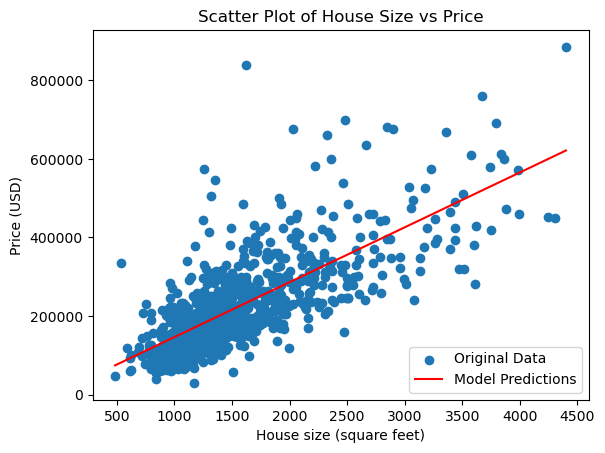

In [12]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

In [18]:
returned_dictionary = cross_validate(
    estimator= lm,
    cv = 5,
    X = sacramento[["sq__ft"]],
    y = sacramento['price'],
    scoring = 'r2' #also do scoring = r2
)

cv_5_df = pd.DataFrame(returned_dictionary)
cv_5_df

,fit_time,score_time,test_score
0,0.002974,0.000898,0.435588
1,0.001353,0.001680,0.535374
2,0.002617,0.001482,0.552512
3,0.001377,0.002029,0.490983
4,0.001192,0.000655,0.524179


In [ ]:
#cv_5_df['test_score'] = cv_5_df['test_score'].abs()

In [19]:
cv_5_df_metrics = cv_5_df.agg(["mean","sem"])
cv_5_df_metrics

,fit_time,score_time,test_score
mean,0.001903,0.001349,0.507727
sem,0.000370,0.000252,0.020646


In [20]:
#multivariable linear regression
mlm = LinearRegression()

In [21]:
mlm.fit(
    sacramento_train[['sq__ft','beds']],
    sacramento_train['price']
)

LinearRegression()

In [22]:
mlm.coef_

array([   167.62705043, -30687.56006942])

In [23]:
mlm.coef_[0]

167.62705043214933

In [25]:
mlm.coef_[1]

-30687.560069420484

In [26]:
mlm.intercept_

62336.77007332363

In [27]:
#make our predictions
sacramento_test['predicted'] = mlm.predict(sacramento_test[["sq__ft","beds"]])

In [28]:
#calculate RMSPE
mlm_rmspe = mean_squared_error(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)**0.5
mlm_rmspe

74441.52046148345

In [29]:
#calculate r2

mlm_r2 = r2_score(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)
mlm_r2

0.49252711187282894

In [33]:
returned_dictionary_mlm = cross_validate(
    estimator= mlm,
    cv = 5,
    X = sacramento[["sq__ft","beds"]],
    y= sacramento['price'],
    scoring = "r2"
)

In [34]:
cv_5_df_mlm = pd.DataFrame(returned_dictionary_mlm)
cv_5_df_mlm['test_score'] = cv_5_df_mlm['test_score'].abs()
cv_5_df_mlm

,fit_time,score_time,test_score
0,0.006177,0.001059,0.456312
1,0.002169,0.001787,0.556060
2,0.002720,0.017552,0.559608
3,0.007060,0.001610,0.483592
4,0.006246,0.003144,0.543327


In [35]:
#aggregate to obtain mean and sem across folds
cv_5_df_metrics_mlm = cv_5_df_mlm.agg(["mean","sem"])
cv_5_df_metrics_mlm

,fit_time,score_time,test_score
mean,0.004875,0.005030,0.51978
sem,0.001008,0.003149,0.02097


In [36]:
#looking at categorical variables
sacramento['type'].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

In [42]:
sacramento_encoded = pd.get_dummies(sacramento, columns=['type'], drop_first=False)
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767,0,0,1
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916,0,0,1
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231,0,0,1
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522,0,0,1
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043,0,0,1
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352,0,0,1
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224,0,0,1
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010,0,0,1


In [43]:
#choose our reference category
sacramento_encoded = sacramento_encoded.drop(columns=["type_Multi-Family"])
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Residential
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767,0,1
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916,0,1
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231,0,1
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522,0,1
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043,0,1
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352,0,1
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224,0,1
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010,0,1


In [39]:
mlm = LinearRegression()

In [40]:
mlm.fit(sacramento_encoded[["sq__ft","type_Multi-Family","type_Residential"]], sacramento_encoded["price"])

LinearRegression()

In [41]:
beta_coef = mlm.coef_
beta_coef

array([   134.69626636, -53699.75640571,  15492.85991368])